In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Część 1 - obróbka danych

#### 1.1. Wczytanie danych

In [81]:
df = pd.read_csv('loan_data.csv', low_memory=False)
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,hardship_payoff_balance_amount,hardship_last_payment_amount,disbursement_method,debt_settlement_flag,debt_settlement_flag_date,settlement_status,settlement_date,settlement_amount,settlement_percentage,settlement_term
0,1077501,NaN,5000.0,5000.0,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,NaN,2500.0,2500.0,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,NaN,2400.0,2400.0,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,NaN,10000.0,10000.0,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,NaN,3000.0,3000.0,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,Cash,N,NaN,NaN,NaN,NaN,NaN,NaN


In [82]:
# podstawowe informacje
print('Rozmiar (wiersze x kolumny): ', df.shape)
print('Podstawowe informacje statystyczne: ', df.describe())
print('\nTypy danych przechowywane w kolumnach: ', df.dtypes.values)
print('\nEtykiety kolumn: ', df.columns.values)

Rozmiar (wiersze x kolumny):  (42536, 151)
Podstawowe informacje statystyczne:         member_id     loan_amnt   funded_amnt  funded_amnt_inv   installment  \
count        0.0  42535.000000  42535.000000     42535.000000  42535.000000   
mean         NaN  11089.722581  10821.585753     10139.938785    322.623063   
std          NaN   7410.938391   7146.914675      7131.598014    208.927216   
min          NaN    500.000000    500.000000         0.000000     15.670000   
25%          NaN   5200.000000   5000.000000      4950.000000    165.520000   
50%          NaN   9700.000000   9600.000000      8500.000000    277.690000   
75%          NaN  15000.000000  15000.000000     14000.000000    428.180000   
max          NaN  35000.000000  35000.000000     35000.000000   1305.190000   

         annual_inc           dti   delinq_2yrs  fico_range_low  \
count  4.253100e+04  42535.000000  42506.000000    42535.000000   
mean   6.913656e+04     13.373043      0.152449      713.052545   
std    

#### 1.2. Usunięcie kolumn które zawierają informacje z przyszłości

In [83]:
df.drop(['issue_d', 'last_pymnt_amnt', 'last_pymnt_d', 'next_pymnt_d', 'pymnt_plan', 
          'mths_since_last_delinq', 'mths_since_last_record', 'total_pymnt', 'recoveries',
        'total_pymnt_inv', 'total_rec_int', 'total_rec_late_fee', 'total_rec_prncp',
        'fico_range_low', 'fico_range_high'], axis=1, inplace=True)
print('Liczba kolumn pozostała po opercji: ',df.shape[1])

Liczba kolumn pozostała po opercji:  136


#### 1.3 Usunięcie kolumn ze zbędnymi informacjami

In [84]:
#sprawdzono, czy kolumny zawierają zduplikowane dane 
#wniosek: istnieją różnice pomiędzy kolumnami
#na tym etapie nie usunięto jednej z kolumn

check = df['loan_amnt'] == df['funded_amnt']
print(False in check.values)

True


In [85]:
#usuwanie kolumn, które zawierają więcej niż 70% pustych wartości (wartość współczynnika pozostaje modyfikowalna)
def tidy_empty(df, boundary=0.7):
    #obliczanie procentu pustych wartości w kolumnach
    percent_nan = df.isnull().sum() / len(df)

    #wybór kolumn, które mają mniej niż percent_nan procent pustych wartości
    selected = percent_nan[percent_nan <= boundary].index

    #tworzenie nowego DataFrame zawierającego tylko wybrane kolumny
    dat = df[selected]

    return dat


#zaimplenetowanie funkcji
dat = tidy_empty(df, boundary=0.7)

# Wyświetlenie wynikowego DataFrame
print('Liczba kolumn pozostała po opercji: ',dat.shape[1])
print(dat.columns)

Liczba kolumn pozostała po opercji:  48
Index(['id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate',
       'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length',
       'home_ownership', 'annual_inc', 'verification_status', 'loan_status',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv',
       'collection_recovery_fee', 'last_credit_pull_d', 'last_fico_range_high',
       'last_fico_range_low', 'collections_12_mths_ex_med', 'policy_code',
       'application_type', 'acc_now_delinq', 'chargeoff_within_12_mths',
       'delinq_amnt', 'pub_rec_bankruptcies', 'tax_liens', 'hardship_flag',
       'disbursement_method', 'debt_settlement_flag'],
      dtype='object')


In [86]:
#usunieto kolumny zawierajace zbędne informacje
dat = dat.drop(['id', 'url', 'last_credit_pull_d', 'pub_rec_bankruptcies', 'emp_title', 'title',
          'zip_code', 'collection_recovery_fee', 'earliest_cr_line', 'funded_amnt',
          'funded_amnt_inv', 'tax_liens', 'delinq_amnt', 'purpose'], axis=1)
print('Liczba kolumn pozostała po opercji: ',dat.shape[1])

Liczba kolumn pozostała po opercji:  34


#### 1.4. Usunięcie kolumn z tylko jedną unikalną wartością

In [87]:
#funkcja automatyzująca usuwanie kolumn z tylko jedną unikalną wartością
def not_unique(df):
    #sprawdzenie liczby unikalnych wartości dla każdej kolumny
    unique = df.nunique()

    #wybór kolumn, które mają więcej niż jedną unikalną wartość
    sel_col = unique[unique > 1].index

    #tworzenie nowego DataFrame zawierającego tylko wybrane kolumny
    x = df[sel_col]

    return x

#zaimplentowanie funkcji
dat = not_unique(dat)

print('Liczba kolumn pozostała po opercji: ',dat.shape[1])

Liczba kolumn pozostała po opercji:  25


#### 1.6. Przekształcenie wartości w kolumnach - usunięcie procentów, dodatkowych znaków, itd

In [88]:
#usuniecie znaku '%' z kolumny int_rate 
dat.head()
x = dat['int_rate'].str[:-1]
x.values

#utworzone obiekty typu 'string' posiadaja biały znak z lewej strony
x = x.str.lstrip()

#zamiana zmiennych typu string na float
x = x.values.astype('float64')

#przypisanie serii danych float do oryginalnej kolumny int_rate
dat['int_rate'] = x
dat.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,debt_settlement_flag
0,5000.0,36 months,10.65,162.87,B,B2,10+ years,RENT,24000.0,Verified,...,1.0,3.0,0.0,13648.0,83.7%,9.0,739.0,735.0,0.0,N
1,2500.0,60 months,15.27,59.83,C,C4,< 1 year,RENT,30000.0,Source Verified,...,5.0,3.0,0.0,1687.0,9.4%,4.0,499.0,0.0,0.0,N
2,2400.0,36 months,15.96,84.33,C,C5,10+ years,RENT,12252.0,Not Verified,...,2.0,2.0,0.0,2956.0,98.5%,10.0,739.0,735.0,0.0,N
3,10000.0,36 months,13.49,339.31,C,C1,10+ years,RENT,49200.0,Source Verified,...,1.0,10.0,0.0,5598.0,21%,37.0,604.0,600.0,0.0,N
4,3000.0,60 months,12.69,67.79,B,B5,1 year,RENT,80000.0,Source Verified,...,0.0,15.0,0.0,27783.0,53.9%,38.0,684.0,680.0,0.0,N


In [89]:
#usuniecie słowa 'months' z kolumny 'term' i konwersja na float64
dat.term = dat.term.str.split().str.get(0)
dat.term = dat.term.astype('float64')
print(dat.term.dtypes)

float64


In [90]:
#przekształcenie kolumny 'emp_length'
x = dat.emp_length.unique()
print('Wejsciowe, unikalne wartosci w kolumnie emp_length:')
print(x)

#przeanalizowano występujące wartości- grupa '10+' jako najwyższa zostanie zamieniona na '10', a '< 1' na '0'
dat['emp_length'] = dat.emp_length.str.split('+').str.get(0)

def conv(arg):
    return '0' if arg == '< 1 year' else arg

dat['emp_length'] = dat.apply(lambda x: conv(x['emp_length']), axis=1)

dat.emp_length = dat.emp_length.str.split().str.get(0)

dat.emp_length = dat.emp_length.astype('float64')

print('\nPo modyfikacji:')
print(dat.emp_length.unique())
print(dat.emp_length.dtype)

Wejsciowe, unikalne wartosci w kolumnie emp_length:
['10+ years' '< 1 year' '1 year' '3 years' '8 years' '9 years' '4 years'
 '5 years' '6 years' '2 years' '7 years' nan]

Po modyfikacji:
[10.  0.  1.  3.  8.  9.  4.  5.  6.  2.  7. nan]
float64


In [91]:
#usuniecie znaku '%' z kolumny revol_util
dat.head()
x = dat['revol_util'].str[:-1]
x.values

#zamiana zmiennych typu string na float
x = x.values.astype('float64')

#przypisanie serii danych float do oryginalnej kolumny int_rate
dat['revol_util'] = x
print(dat.revol_util.head())

0    83.7
1     9.4
2    98.5
3    21.0
4    53.9
Name: revol_util, dtype: float64


In [92]:
#przeglad wpisów z kolumny loan_status
dat.loan_status.unique()

array(['Fully Paid', 'Charged Off', nan,
       'Does not meet the credit policy. Status:Fully Paid',
       'Does not meet the credit policy. Status:Charged Off'],
      dtype=object)

In [93]:
#utworzenie funkcji usuwającej zbędny komentarz 'Does not meet the credit...'
def tidy(arg):
    if arg == 'Does not meet the credit policy. Status:Fully Paid':
        return 'Fully Paid'
    elif arg == 'Does not meet the credit policy. Status:Charged Off':
        return 'Charged Off'
    else:
        return arg
    
#zaimplementowanie funkcji na data series
dat.loan_status = dat.apply(lambda x: tidy(x['loan_status']), axis=1)
dat.loan_status.unique()

array(['Fully Paid', 'Charged Off', nan], dtype=object)

In [94]:
#przegląd wartości kolumny 'verification_status'
print('Było: ', dat['verification_status'].unique())

#funckja porządkująca wpisy - source verified --> verified
def tidy(x):
    return 'Verified' if x == 'Source Verified' else x

dat.verification_status = dat.apply(lambda x: tidy(x['verification_status']), axis=1)
print('Jest: ', dat.verification_status.unique())

Było:  ['Verified' 'Source Verified' 'Not Verified' nan]
Jest:  ['Verified' 'Not Verified' nan]


In [95]:
#przegląd wartości kolumny 'debt_settlement_flag'
print(dat.debt_settlement_flag.unique())

#zamiana wpisów 'N'/'Y' na '0'/'1' za pomoca zaimplementowania funckji

def make_dummies(x):
    return 1 if x == 'Y' else 0

dat.debt_settlement_flag = dat.apply(lambda x: make_dummies(x['debt_settlement_flag']), axis=1)

['N' 'Y' nan]


In [96]:
#przekształcenie wpisów z kolumny loan_status w warości zerojedynkowe na potrzeby analizy korelacji w części 2 projektu
print(dat.loan_status.unique())
dat = pd.get_dummies(dat, columns=['loan_status'], prefix='loan_sts', prefix_sep='=', drop_first=True)
dat.head(10)

['Fully Paid' 'Charged Off' nan]


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,debt_settlement_flag,loan_sts=Fully Paid
0,5000.0,36.0,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,...,3.0,0.0,13648.0,83.7,9.0,739.0,735.0,0.0,0,1
1,2500.0,60.0,15.27,59.83,C,C4,0.0,RENT,30000.0,Verified,...,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0,0
2,2400.0,36.0,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,...,2.0,0.0,2956.0,98.5,10.0,739.0,735.0,0.0,0,1
3,10000.0,36.0,13.49,339.31,C,C1,10.0,RENT,49200.0,Verified,...,10.0,0.0,5598.0,21.0,37.0,604.0,600.0,0.0,0,1
4,3000.0,60.0,12.69,67.79,B,B5,1.0,RENT,80000.0,Verified,...,15.0,0.0,27783.0,53.9,38.0,684.0,680.0,0.0,0,1
5,5000.0,36.0,7.90,156.46,A,A4,3.0,RENT,36000.0,Verified,...,9.0,0.0,7963.0,28.3,12.0,564.0,560.0,0.0,0,1
6,7000.0,60.0,15.96,170.08,C,C5,8.0,RENT,47004.0,Not Verified,...,7.0,0.0,17726.0,85.6,11.0,654.0,650.0,0.0,0,1
7,3000.0,36.0,18.64,109.43,E,E1,9.0,RENT,48000.0,Verified,...,4.0,0.0,8221.0,87.5,4.0,689.0,685.0,0.0,0,1
8,5600.0,60.0,21.28,152.39,F,F2,4.0,OWN,40000.0,Verified,...,11.0,0.0,5210.0,32.6,13.0,499.0,0.0,0.0,0,0
9,5375.0,60.0,12.69,121.45,B,B5,0.0,RENT,15000.0,Verified,...,2.0,0.0,9279.0,36.5,3.0,504.0,500.0,0.0,0,0


#### 1.7. Analiza brakujących wartości wraz z ich uzupełnieniem/usunięciem przy wzięciu pod uwagę pewnych ustalonych kryteriów

In [97]:
print(dat.isna().sum())
dat.head()

loan_amnt                   1
term                        1
int_rate                    1
installment                 1
grade                       1
sub_grade                   1
emp_length               1113
home_ownership              1
annual_inc                  5
verification_status         1
desc                    13294
addr_state                  1
dti                         1
delinq_2yrs                30
inq_last_6mths             30
open_acc                   30
pub_rec                    30
revol_bal                   1
revol_util                 91
total_acc                  30
last_fico_range_high        1
last_fico_range_low         1
acc_now_delinq             30
debt_settlement_flag        0
loan_sts=Fully Paid         0
dtype: int64


,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,verification_status,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,last_fico_range_high,last_fico_range_low,acc_now_delinq,debt_settlement_flag,loan_sts=Fully Paid
0,5000.0,36.0,10.65,162.87,B,B2,10.0,RENT,24000.0,Verified,...,3.0,0.0,13648.0,83.7,9.0,739.0,735.0,0.0,0,1
1,2500.0,60.0,15.27,59.83,C,C4,0.0,RENT,30000.0,Verified,...,3.0,0.0,1687.0,9.4,4.0,499.0,0.0,0.0,0,0
2,2400.0,36.0,15.96,84.33,C,C5,10.0,RENT,12252.0,Not Verified,...,2.0,0.0,2956.0,98.5,10.0,739.0,735.0,0.0,0,1
3,10000.0,36.0,13.49,339.31,C,C1,10.0,RENT,49200.0,Verified,...,10.0,0.0,5598.0,21.0,37.0,604.0,600.0,0.0,0,1
4,3000.0,60.0,12.69,67.79,B,B5,1.0,RENT,80000.0,Verified,...,15.0,0.0,27783.0,53.9,38.0,684.0,680.0,0.0,0,1


In [98]:
#usniecie jednego pustego wiersza
dat.drop(dat.loc[dat['loan_amnt'].isna(), :].index, inplace=True)

In [99]:
#szacunkowe zastapienie pustych komorek serii emp_length w oparciu o subkietywnie wyselekcjonowane dane
dat['emp_length'] = dat.groupby(['last_fico_range_high', 'home_ownership', 'verification_status',
                                 'loan_sts=Fully Paid'])['emp_length'].transform(lambda x: x.fillna(x.mean())).round(0)

In [100]:
#zastapienie wszystkich komórek 'desc' długością stringa - 
#czy długość uzasadanienia ma wpływ na wiarygodność pożyczkobiorców 
#funckja zastępująca str jego długością

def str_to_len(x):
    try:
        return len(x)
    except:
        return 0

dat.desc = dat.apply(lambda x: str_to_len(x['desc']), axis=1)
dat['desc'].unique()

array([  78,  590,    0, ..., 1905, 1621, 1762], dtype=int64)

##### Uzupełnienie brakujących wartości w kolumnie 'annual_inc'

In [101]:
#ponowny podgląd ilości pustych wartości
print(dat.isna().sum())

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               6
home_ownership           0
annual_inc               4
verification_status      0
desc                     0
addr_state               0
dti                      0
delinq_2yrs             29
inq_last_6mths          29
open_acc                29
pub_rec                 29
revol_bal                0
revol_util              90
total_acc               29
last_fico_range_high     0
last_fico_range_low      0
acc_now_delinq          29
debt_settlement_flag     0
loan_sts=Fully Paid      0
dtype: int64


In [102]:
#sprawdzenie jakiej wysokości pożyczki zostały udzielone osobom bez podanego rocznego dochodu
print(dat.loc[dat['annual_inc'].isna(), 'loan_amnt'])

42450    5000.0
42451    7000.0
42481    6700.0
42534    6500.0
Name: loan_amnt, dtype: float64


In [103]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 5000.0
srednia = round(dat.loc[dat['loan_amnt'] == 5000, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 5000) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [104]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 7000.0
srednia = round(dat.loc[dat['loan_amnt'] == 7000, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 7000) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [105]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 7000.0
srednia = round(dat.loc[dat['loan_amnt'] == 6700, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 6700) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [106]:
#uzupełnienie pustej komórki wartością średnią z rocznych dochdów klientów, którym przyznano pożyczkę w kwocie 7000.0
srednia = round(dat.loc[dat['loan_amnt'] == 6500, ['annual_inc']]['annual_inc'].mean())
dat.loc[(dat['loan_amnt'] == 6500) & (dat['annual_inc'].isna()), 'annual_inc'] = srednia

In [107]:
#sprawdzenie
print(dat.isna().sum())

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               6
home_ownership           0
annual_inc               0
verification_status      0
desc                     0
addr_state               0
dti                      0
delinq_2yrs             29
inq_last_6mths          29
open_acc                29
pub_rec                 29
revol_bal                0
revol_util              90
total_acc               29
last_fico_range_high     0
last_fico_range_low      0
acc_now_delinq          29
debt_settlement_flag     0
loan_sts=Fully Paid      0
dtype: int64


In [108]:
#czy powtarzająca się liczba 29 pustych wartości odniosi się do tych samych wierszy? - weryfikacja
dat.loc[dat['delinq_2yrs'].isna(), ['inq_last_6mths', 'open_acc', 'pub_rec', 
                                    'total_acc', 'acc_now_delinq', 'delinq_2yrs']].shape[0]

29

In [109]:
#usuniecie wszystkich 29 pustych indeksów zgodnie z powyższą weryfikacją 
dat.drop(dat[dat['delinq_2yrs'].isna()].index, inplace=True)

In [110]:
#sprawdzenie
print(dat.isna().sum())

loan_amnt                0
term                     0
int_rate                 0
installment              0
grade                    0
sub_grade                0
emp_length               6
home_ownership           0
annual_inc               0
verification_status      0
desc                     0
addr_state               0
dti                      0
delinq_2yrs              0
inq_last_6mths           0
open_acc                 0
pub_rec                  0
revol_bal                0
revol_util              61
total_acc                0
last_fico_range_high     0
last_fico_range_low      0
acc_now_delinq           0
debt_settlement_flag     0
loan_sts=Fully Paid      0
dtype: int64


In [111]:
#weryfikacja powiązania revol_util (puste pola) z revol_bal - NaN w revol_util odpowiada wartosci 0 w revol_bal
dat.loc[dat['revol_util'].isna(), ['revol_bal' , 'revol_util']]

,revol_bal,revol_util
3577,0.0,NaN
4730,0.0,NaN
4960,0.0,NaN
11315,0.0,NaN
12076,0.0,NaN
...,...,...
41684,0.0,NaN
41694,0.0,NaN
42452,0.0,NaN
42465,0.0,NaN


In [112]:
#zastąpienie wartosci NaN w kolumnie revol_util wartosciami 0
dat.revol_util.fillna(0, inplace=True)

In [113]:
#sprawdzenie
print(dat.isna().sum())
dat.shape

loan_amnt               0
term                    0
int_rate                0
installment             0
grade                   0
sub_grade               0
emp_length              6
home_ownership          0
annual_inc              0
verification_status     0
desc                    0
addr_state              0
dti                     0
delinq_2yrs             0
inq_last_6mths          0
open_acc                0
pub_rec                 0
revol_bal               0
revol_util              0
total_acc               0
last_fico_range_high    0
last_fico_range_low     0
acc_now_delinq          0
debt_settlement_flag    0
loan_sts=Fully Paid     0
dtype: int64


(42506, 25)

# Część 2 - eksploracyjna analiza danych

#### 2.1. Wysokopoziomowa analiza cech - ogólny rzut okiem który pozwoli lepiej zrozumieć dane

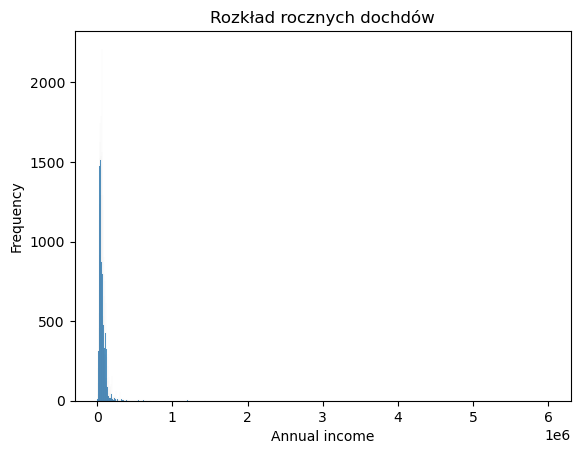

Najwyższy roczny dochód w analizowanej grupie:  6000000.0
Najniższy roczny dochód w analizowanej grupie:  1896.0
Średni roczny dochód w analizowanej grupie:  69135.0
Mediana dochód w analizowanej grupie:  59000.0


In [114]:
#przedstawienie rozkładu rocznych dochodów pożyczkobiorców

sns.histplot(data=dat, x='annual_inc')

plt.title('Rozkład rocznych dochdów')
plt.xlabel('Annual income')
plt.ylabel('Frequency')

plt.show()
#podczas tworzenia histogramu zaobserwowano wartość znacząco odstającą od pozostałych
print('Najwyższy roczny dochód w analizowanej grupie: ',dat.annual_inc.max())
print('Najniższy roczny dochód w analizowanej grupie: ',dat.annual_inc.min())
print('Średni roczny dochód w analizowanej grupie: ',round(dat.annual_inc.mean(),0))
print('Mediana dochód w analizowanej grupie: ',dat.annual_inc.median())

#### Podczas tworzenia histogramu zaobserwowano wartość znacząco odstającą od pozostałych
#### Wartość maksymalna rocznych dochodów wynosi 6 000 000, podczas gdy średnia to 69135, mediana wynosi 59000, a minimalna wartość w całym rozkładzie wynosi 1896

##### Rozkład cechy zostanie wygenrowany ponownie z ograniczeniem na osi x 

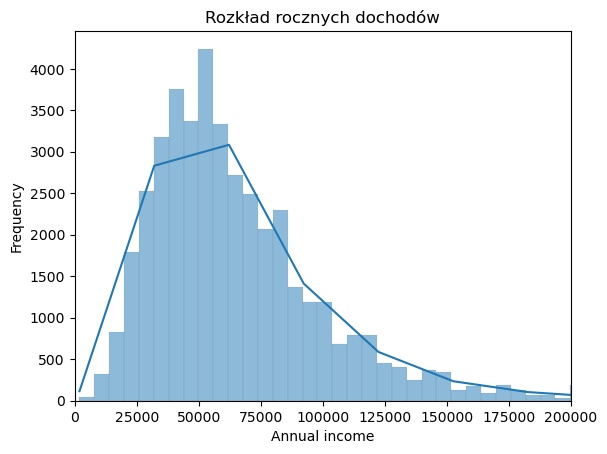

In [115]:
#ponowne wygenerowaie histogramu z ograniczeniem na osie x do 200 000
sns.histplot(data=dat, x='annual_inc', kde=True, bins=1000)

plt.title('Rozkład rocznych dochodów')
plt.xlabel('Annual income')
plt.ylabel('Frequency')

plt.xlim(0, 200_000)

plt.show()

<AxesSubplot:xlabel='dti'>

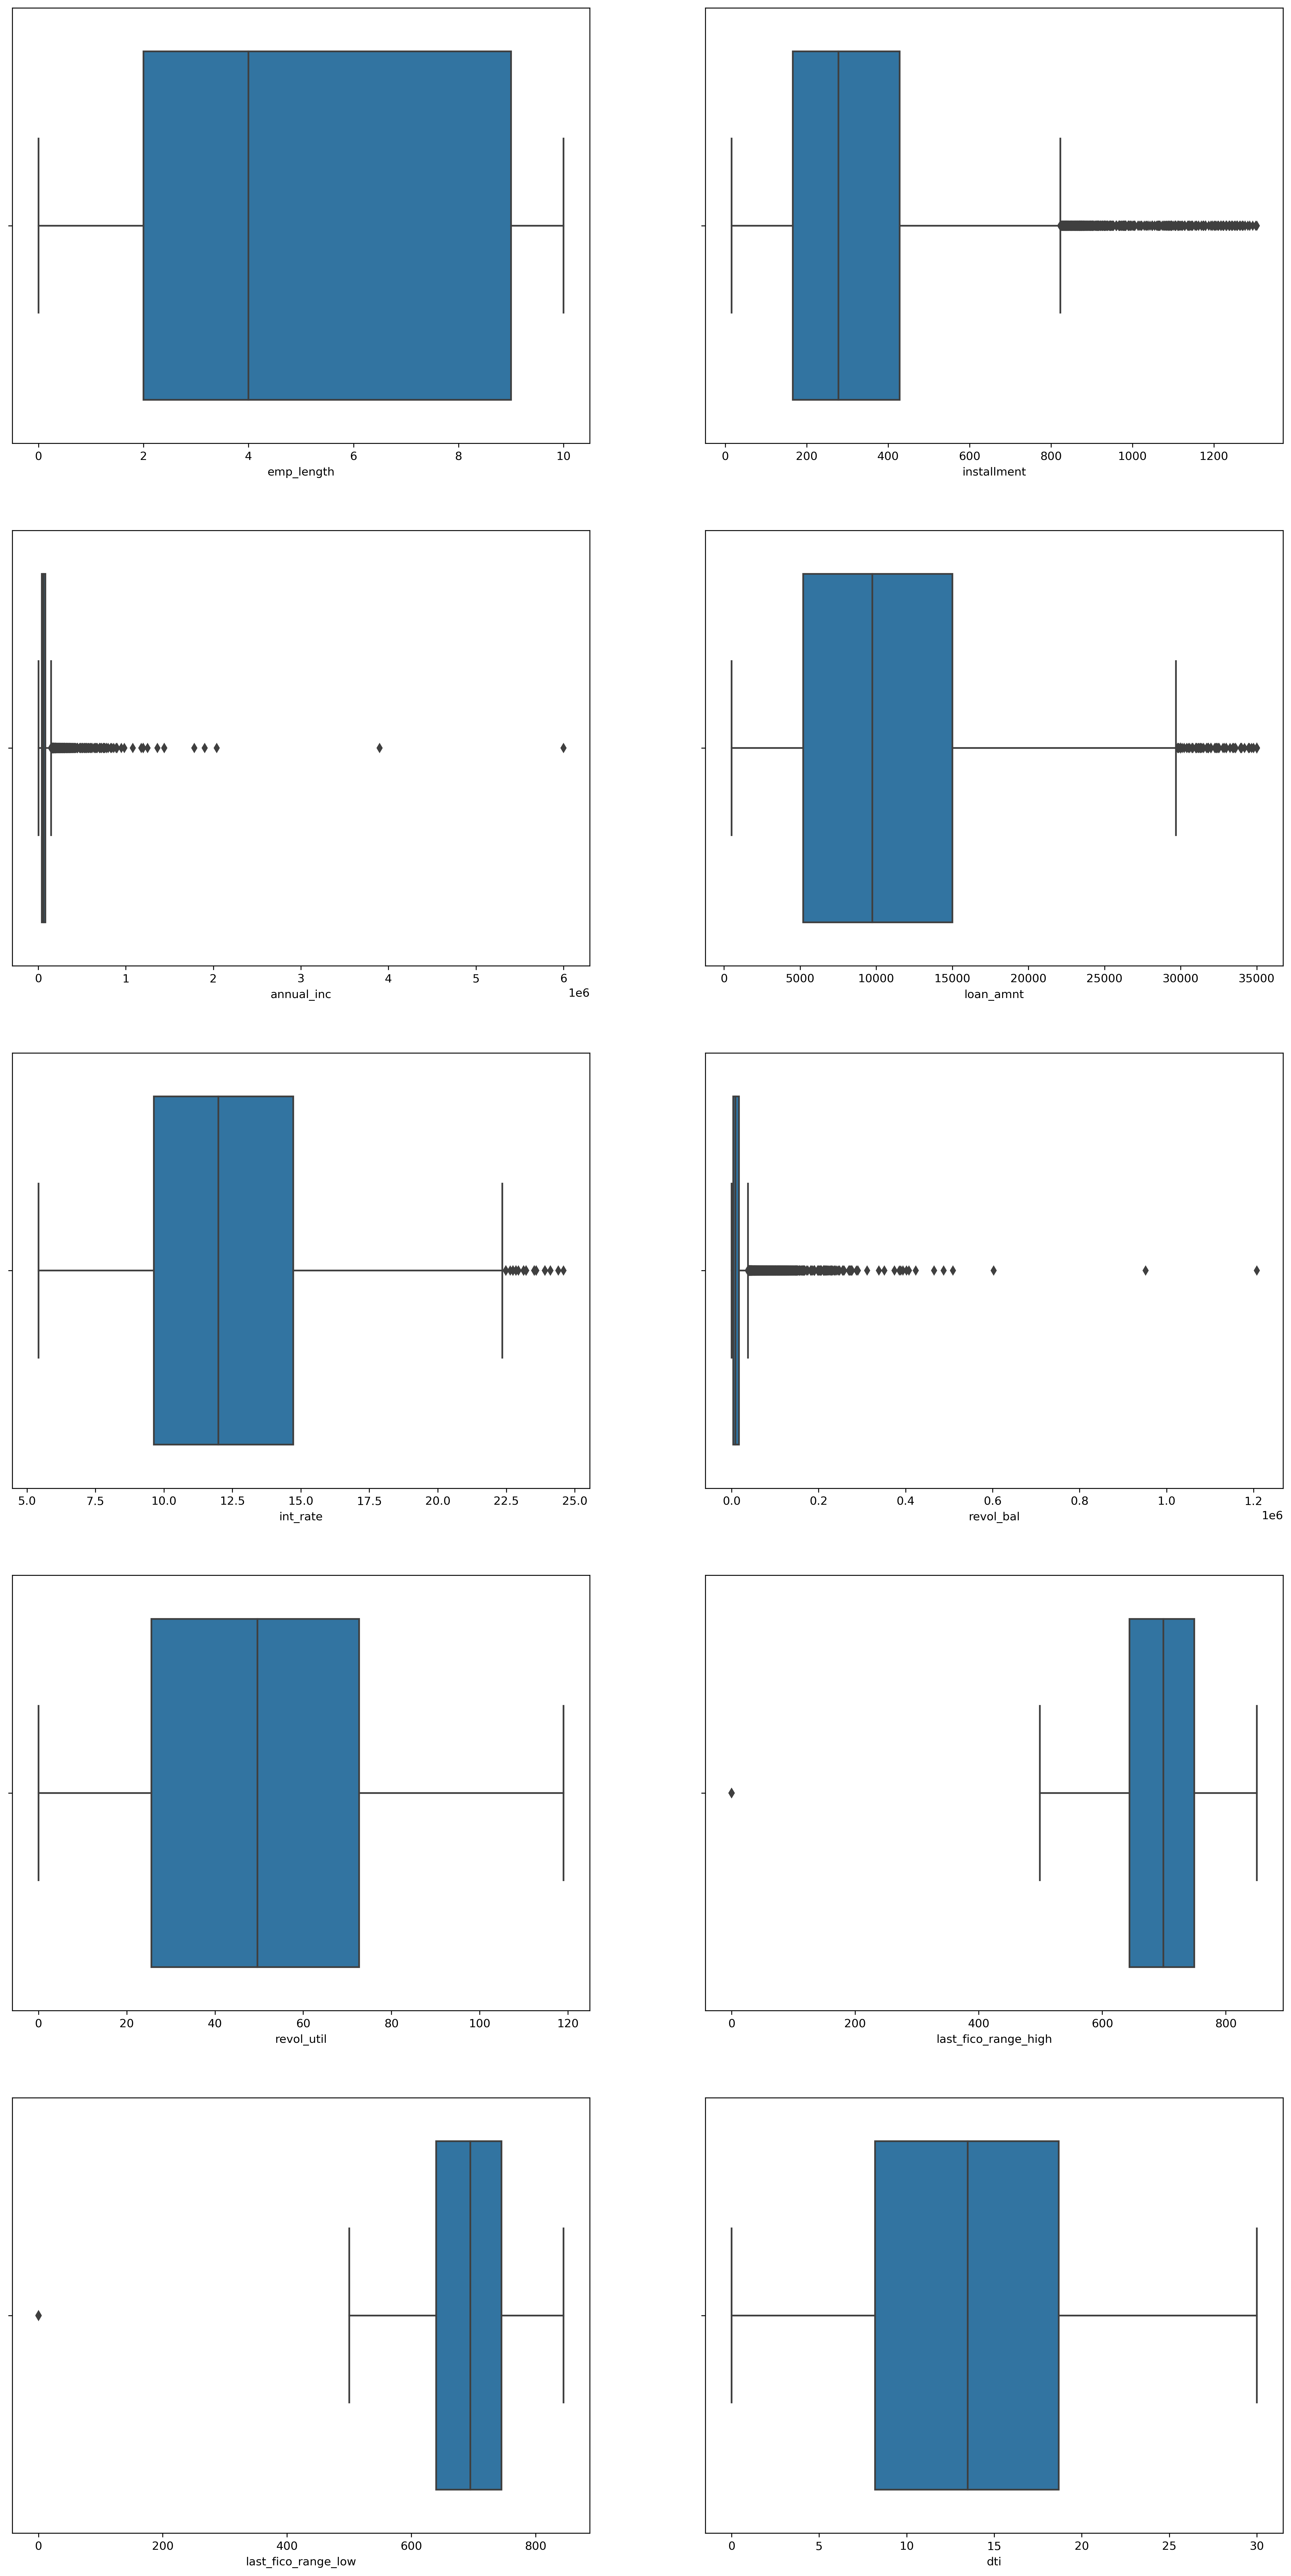

In [171]:
#sprawdzenie outliersów

plt.figure(figsize=(20, 40), dpi=300)
#plt.suptitle('Outliers check')

plt.subplot(5,2,1)
sns.boxplot(x='emp_length', data=dat)

plt.subplot(5,2,2)
sns.boxplot(x='installment', data=dat)

plt.subplot(5,2,3)
sns.boxplot(x='annual_inc', data=dat)

plt.subplot(5,2,4)
sns.boxplot(x='loan_amnt', data=dat)

plt.subplot(5,2,5)
sns.boxplot(x='int_rate', data=dat)

plt.subplot(5,2,6)
sns.boxplot(x='revol_bal', data=dat)

plt.subplot(5,2,7)
sns.boxplot(x='revol_util', data=dat)

plt.subplot(5,2,8)
sns.boxplot(x='last_fico_range_high', data=dat)

plt.subplot(5,2,9)
sns.boxplot(x='last_fico_range_low', data=dat)

plt.subplot(5,2,10)
sns.boxplot(x='dti', data=dat)

<AxesSubplot:xlabel='loan_sts=Fully Paid', ylabel='int_rate'>

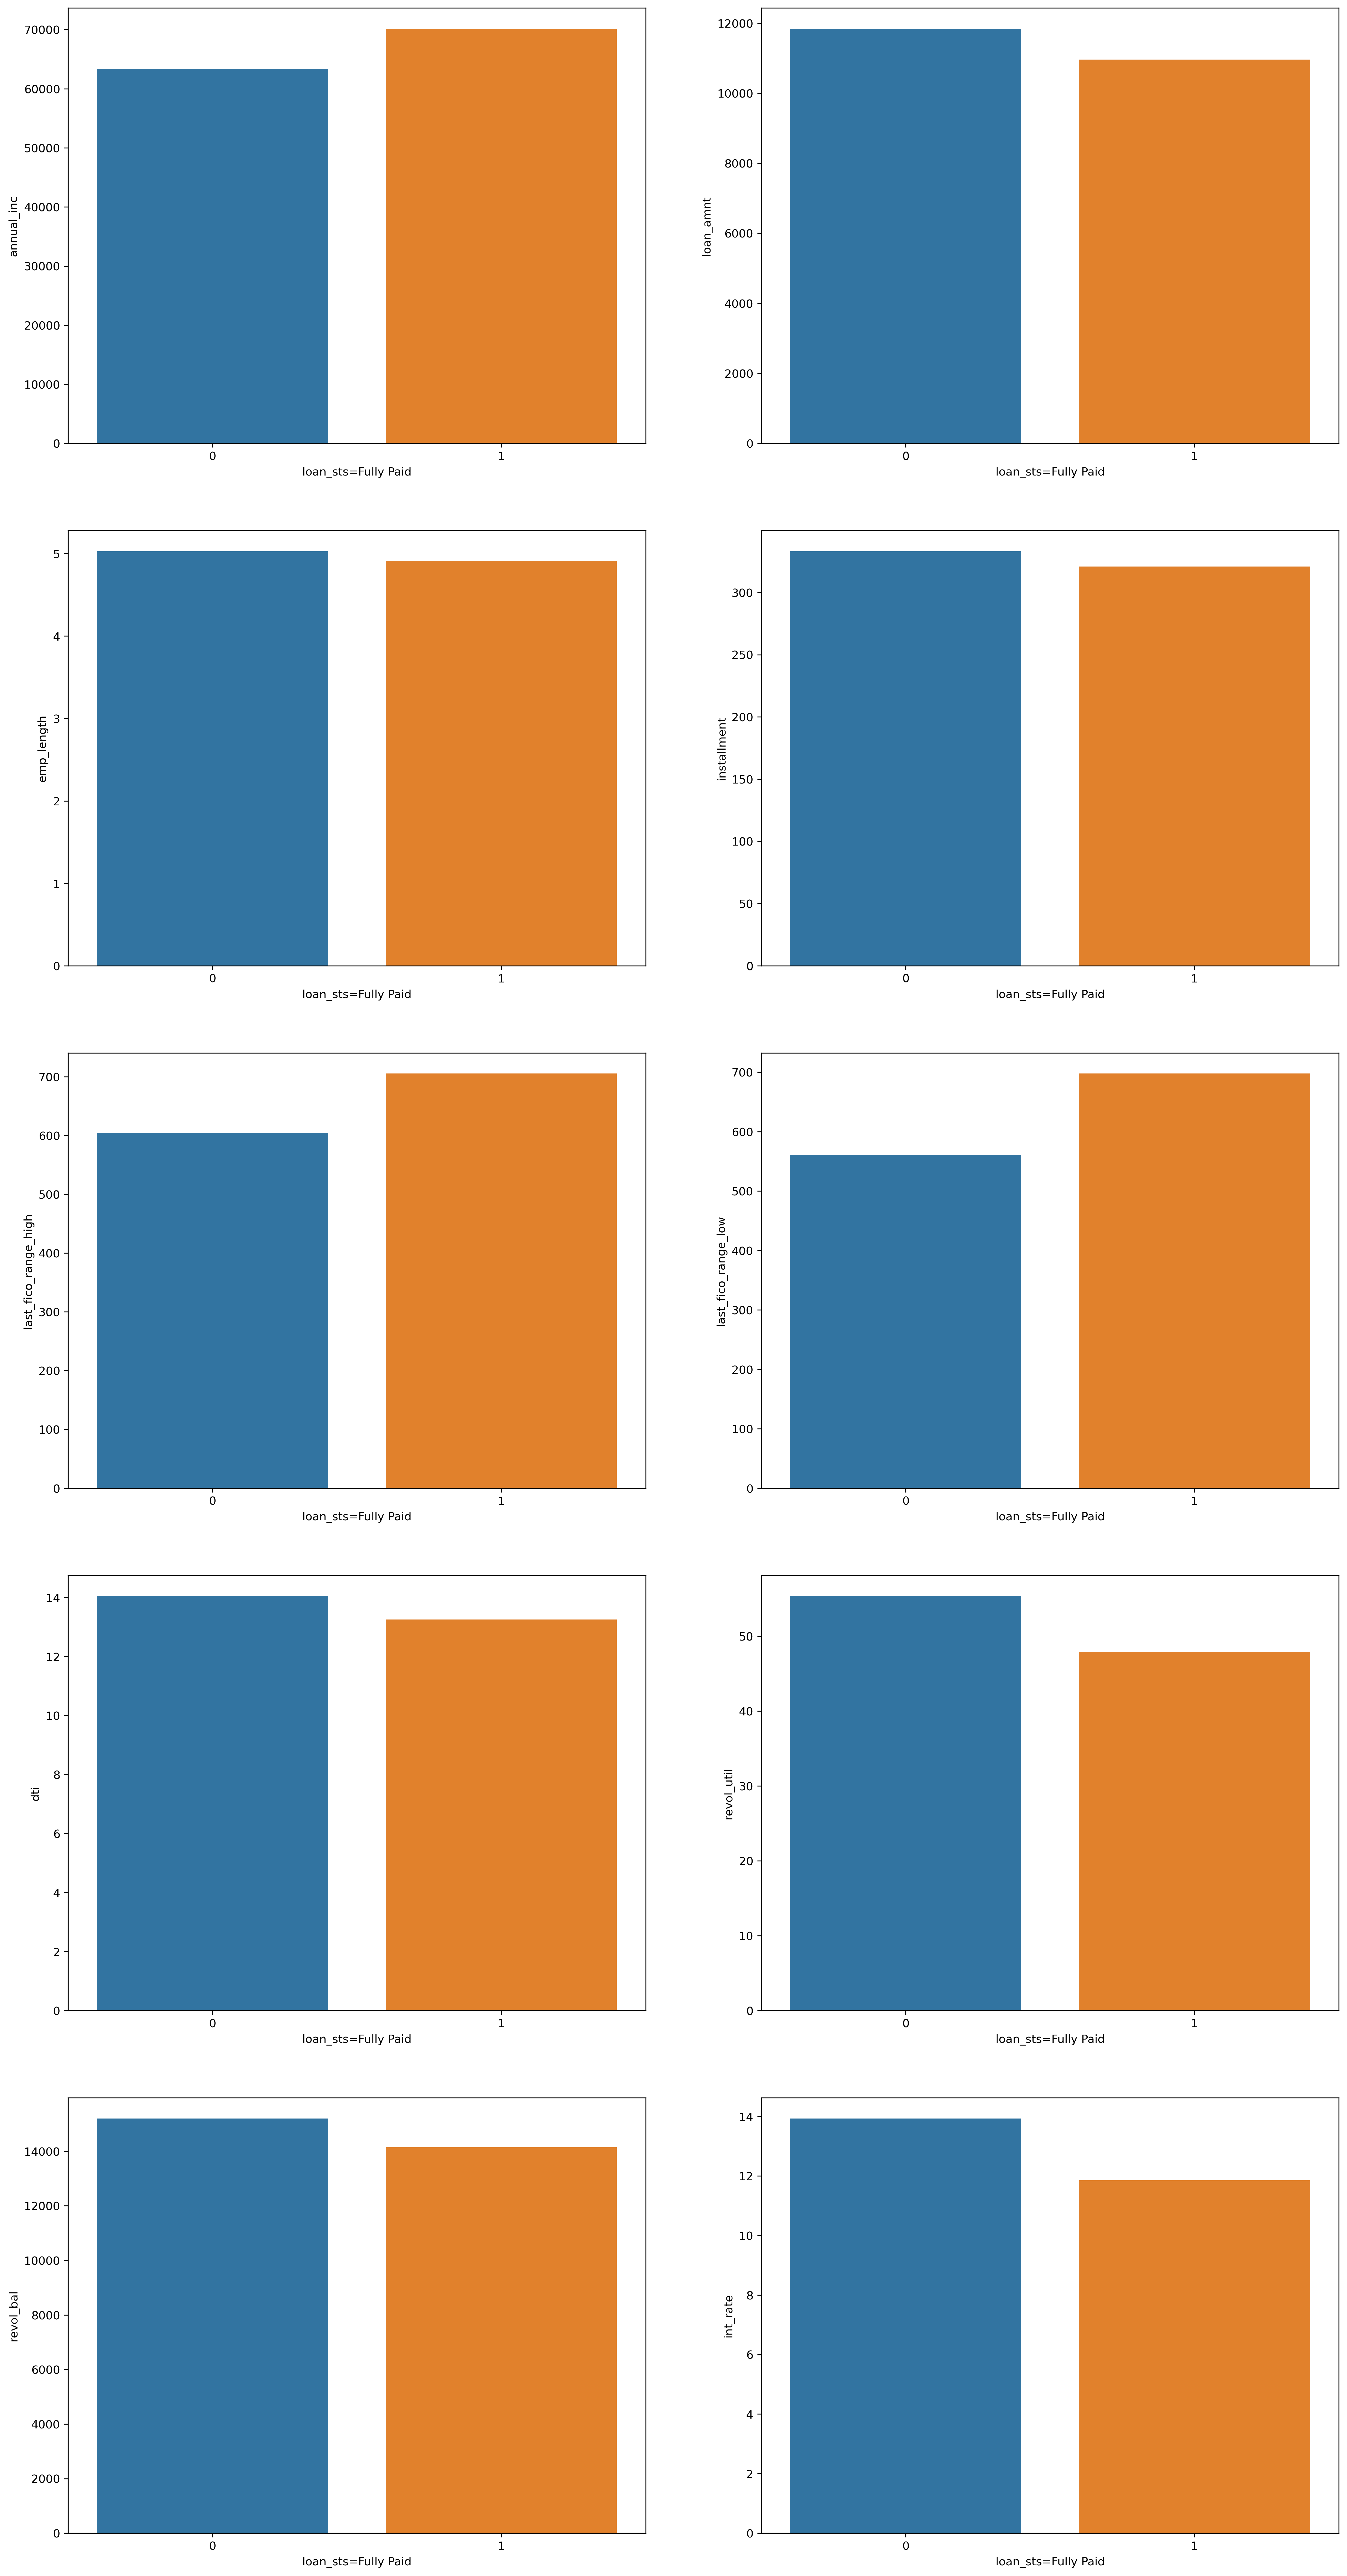

In [178]:
#sprawdzenie średnich wartości danych liczbowych w odniesieniu do statusu końcowego pożyczki

plt.figure(figsize=(20,40),dpi=300)

plt.subplot(5,2,1)
sns.barplot(x='loan_sts=Fully Paid', y='annual_inc', data=dat, ci=None)

plt.subplot(5,2,2)
sns.barplot(x='loan_sts=Fully Paid', y='loan_amnt', data=dat, ci=None)

plt.subplot(5,2,3)
sns.barplot(x='loan_sts=Fully Paid', y='emp_length', data=dat, ci=None)

plt.subplot(5,2,4)
sns.barplot(x='loan_sts=Fully Paid', y='installment', data=dat, ci=None)

plt.subplot(5,2,5)
sns.barplot(x='loan_sts=Fully Paid', y='last_fico_range_high', data=dat, ci=None)

plt.subplot(5,2,6)
sns.barplot(x='loan_sts=Fully Paid', y='last_fico_range_low', data=dat, ci=None)

plt.subplot(5,2,7)
sns.barplot(x='loan_sts=Fully Paid', y='dti', data=dat, ci=None)

plt.subplot(5,2,8)
sns.barplot(x='loan_sts=Fully Paid', y='revol_util', data=dat, ci=None)

plt.subplot(5,2,9)
sns.barplot(x='loan_sts=Fully Paid', y='revol_bal', data=dat, ci=None)

plt.subplot(5,2,10)
sns.barplot(x='loan_sts=Fully Paid', y='int_rate', data=dat, ci=None)

<AxesSubplot:>

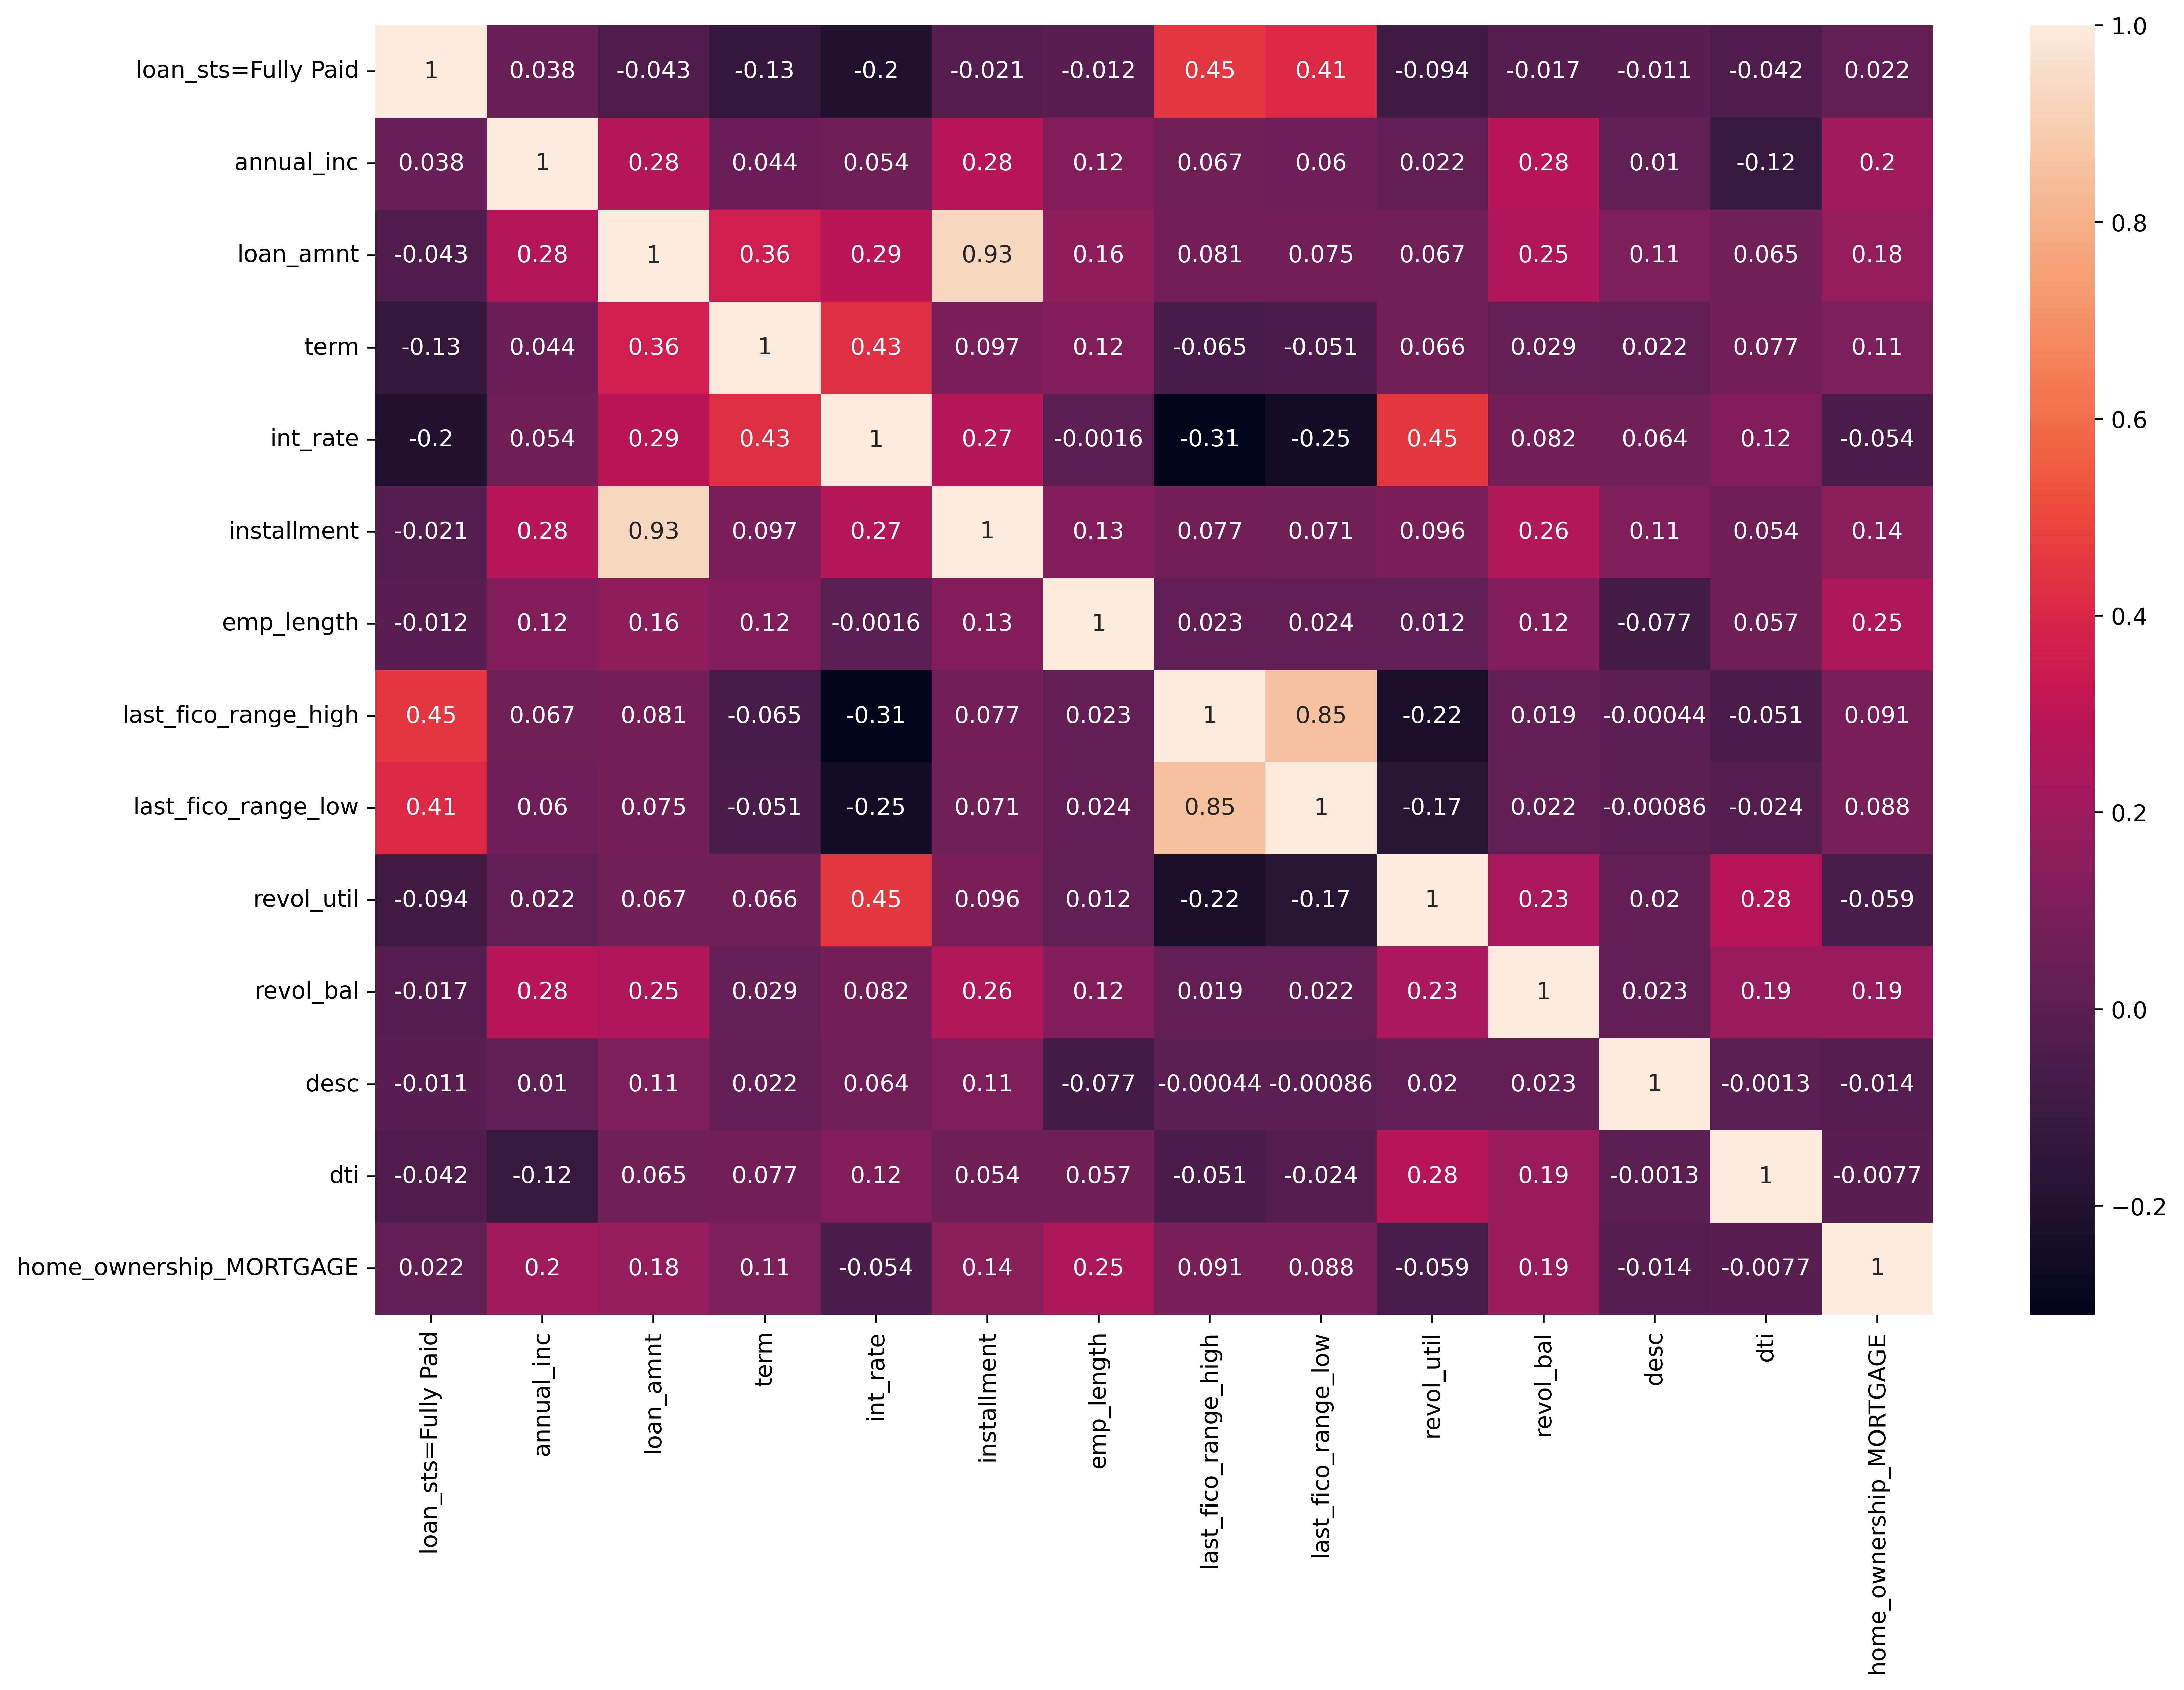

In [118]:
#heatmapa korelacji

#na potrzeby tworzonej heatmapy oraz dla znalezienia odpowiedzi na pytanie nr 3: 'W jaki sposób status kredytu 
#hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?' utworzono tymczosowe zmienną typu dummies
#(trwałe przekształcenie kolumny 'home_ownership' na zmienne typu dummies wykonane zostanie w części 3 Feature Engineering)

dat_temp = pd.get_dummies(dat, columns=['home_ownership'])
heatmap_set = dat_temp[['loan_sts=Fully Paid', 'annual_inc', 'loan_amnt', 'term', 'int_rate', 'installment',
                  'emp_length', 'last_fico_range_high', 'last_fico_range_low', 'revol_util', 'revol_bal',
                  'desc', 'dti', 'home_ownership_MORTGAGE']]

plt.figure(figsize=(15,10), dpi=500)
sns.heatmap(data=heatmap_set.corr(), annot=True)

#### Wnioski z powyższej heatmapy zostaną ujętę w odpowiedziach na część pytań załączonych do projektu

### 1. W jaki sposób wynik FICO wiąże się z prawdopodobieństwem spłacenia pożyczki przez pożyczkobiorcę?

#### Odp.: Z analizowanych zmiennych, ranking FICO osiąga najwyższą wartość współczynnika korelcji (zarówna 'last FICO high' jak i 'low') ze statusem pożyczki (loan_sts=Full Paid). Należy zatem przyjąć, iż wartości punktacji FICO pożyczkobiorcy ma największy wpływ na ocene ryzyka udzielenia pożyczki

### 2. W jaki sposób wiek kredytowy wiąże się z prawdopodobieństwem niewykonania zobowiązania i czy ryzyko to jest niezależne lub związane z wynikiem FICO?

#### Odp.: Korelacja pomiędzy wiekiem kredytowym (długością okresu kredytowania) jest drugą po FICO najbardziej wpływającą na ostateczny status pożyczki. Choć wciąż nie jest to wysoka korelacja (-0.13), można przyjąć, iż na tle analizowanych zmiennych im krótszy okres kredytowania, tym prawdopodobieństwo spłacenia pożyczki jest wyższe

### 3. W jaki sposób status kredytu hipotecznego na dom wiąże się z prawdopodobieństwem niewypłacalności?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a obciążeniem hipoteką jest znikome (-0.022). Należy zatem przyjąć, że fakt obciążenia hipoteką nie wpływa na spłacalność

### 4. W jaki sposób roczny dochód wiąże się z prawdopodobieństwem niewykonania zobowiązania?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a rocznym dochodem jest znikoma (0.038). Należy zatem przyjąć, że wysokość rocznego dochodu nie wpływa na spłacalność, a jedynie na wysokość udzielonej pożyczki - korelacja na poziomie 0.28

### 5. W jaki sposób historia zatrudnienia wiąże się z prawdopodobieństwem niewykonania zobowiązania?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a hisotrią zatrudnienia (długość zatrudneinia) jest znikoma (-0.012). Należy zatem przyjąć, że długość zatrudnienia nie wpływa na spłacalność

### 6. Jak wielkość żądanej pożyczki jest powiązana z prawdopodobieństwem niewykonania zobowiązania?

#### Korelacja pomiędzy statusem pożyczki (spłacona / niespłacona) a jej wysokością jest znikoma (-0.043). Należy zatem przyjąć, że wysokość udzielonej kwoty pożyczki nie wpływa na spłacalność

# Część 3 - feature engineering

In [119]:
#podgląd danych
dat.head(20)
print('Ilosc kolumn przed feature engineering: ', dat.shape[1])

Ilosc kolumn przed feature engineering:  25


In [120]:
#z podglądu danych wywnioskowano, iż kolumna home_ownership nadaje się do zastosowania dummy coding
dat = pd.get_dummies(dat, columns=['home_ownership'], prefix='home_own', prefix_sep='=')
dat.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,verification_status,desc,...,last_fico_range_high,last_fico_range_low,acc_now_delinq,debt_settlement_flag,loan_sts=Fully Paid,home_own=MORTGAGE,home_own=NONE,home_own=OTHER,home_own=OWN,home_own=RENT
0,5000.0,36.0,10.65,162.87,B,B2,10.0,24000.0,Verified,78,...,739.0,735.0,0.0,0,1,0,0,0,0,1
1,2500.0,60.0,15.27,59.83,C,C4,0.0,30000.0,Verified,590,...,499.0,0.0,0.0,0,0,0,0,0,0,1
2,2400.0,36.0,15.96,84.33,C,C5,10.0,12252.0,Not Verified,0,...,739.0,735.0,0.0,0,1,0,0,0,0,1
3,10000.0,36.0,13.49,339.31,C,C1,10.0,49200.0,Verified,180,...,604.0,600.0,0.0,0,1,0,0,0,0,1
4,3000.0,60.0,12.69,67.79,B,B5,1.0,80000.0,Verified,306,...,684.0,680.0,0.0,0,1,0,0,0,0,1
5,5000.0,36.0,7.90,156.46,A,A4,3.0,36000.0,Verified,0,...,564.0,560.0,0.0,0,1,0,0,0,0,1
6,7000.0,60.0,15.96,170.08,C,C5,8.0,47004.0,Not Verified,279,...,654.0,650.0,0.0,0,1,0,0,0,0,1
7,3000.0,36.0,18.64,109.43,E,E1,9.0,48000.0,Verified,57,...,689.0,685.0,0.0,0,1,0,0,0,0,1
8,5600.0,60.0,21.28,152.39,F,F2,4.0,40000.0,Verified,322,...,499.0,0.0,0.0,0,0,0,0,0,1,0
9,5375.0,60.0,12.69,121.45,B,B5,0.0,15000.0,Verified,473,...,504.0,500.0,0.0,0,0,0,0,0,0,1


In [121]:
#do tej samej operacji nadaje się również kolumna verification_status
dat = pd.get_dummies(dat, columns=['verification_status'], prefix='inc_sts', prefix_sep='=', drop_first=True)
dat.head(10)

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_length,annual_inc,desc,addr_state,...,last_fico_range_low,acc_now_delinq,debt_settlement_flag,loan_sts=Fully Paid,home_own=MORTGAGE,home_own=NONE,home_own=OTHER,home_own=OWN,home_own=RENT,inc_sts=Verified
0,5000.0,36.0,10.65,162.87,B,B2,10.0,24000.0,78,AZ,...,735.0,0.0,0,1,0,0,0,0,1,1
1,2500.0,60.0,15.27,59.83,C,C4,0.0,30000.0,590,GA,...,0.0,0.0,0,0,0,0,0,0,1,1
2,2400.0,36.0,15.96,84.33,C,C5,10.0,12252.0,0,IL,...,735.0,0.0,0,1,0,0,0,0,1,0
3,10000.0,36.0,13.49,339.31,C,C1,10.0,49200.0,180,CA,...,600.0,0.0,0,1,0,0,0,0,1,1
4,3000.0,60.0,12.69,67.79,B,B5,1.0,80000.0,306,OR,...,680.0,0.0,0,1,0,0,0,0,1,1
5,5000.0,36.0,7.90,156.46,A,A4,3.0,36000.0,0,AZ,...,560.0,0.0,0,1,0,0,0,0,1,1
6,7000.0,60.0,15.96,170.08,C,C5,8.0,47004.0,279,NC,...,650.0,0.0,0,1,0,0,0,0,1,0
7,3000.0,36.0,18.64,109.43,E,E1,9.0,48000.0,57,CA,...,685.0,0.0,0,1,0,0,0,0,1,1
8,5600.0,60.0,21.28,152.39,F,F2,4.0,40000.0,322,CA,...,0.0,0.0,0,0,0,0,0,1,0,1
9,5375.0,60.0,12.69,121.45,B,B5,0.0,15000.0,473,TX,...,500.0,0.0,0,0,0,0,0,0,1,1


In [122]:
#utworzenie kolumny przedstawiającej stosunek wysokości pożyczki do rocznych dochodów
dat['loan_to_income_ratio'] = dat['loan_amnt'] / dat['annual_inc']

In [123]:
#utworzenie kolumny ze słownym opisem rankingu FICO pożyczkobiorcy na podstawie źródłowego pliku pdf
#funckja klasyfikująca wynik
def fico_rating(x):
    if x < 580:
        return 'Poor'
    elif x in range(580,670):
        return 'Fair'
    elif x in range(671,740):
        return 'Good'
    elif x in range(741,800):
        return 'Very Good'
    elif x >= 800:
        return 'Exceptional'

#zaimplementowanie funckji
dat['last_fico_rating_high'] = dat.apply(lambda x: fico_rating(x['last_fico_range_high']), axis=1)
dat['last_fico_rating_low'] = dat.apply(lambda x: fico_rating(x['last_fico_range_low']), axis=1)

dat[['last_fico_range_high' , 'last_fico_rating_high' , 'last_fico_range_low' , 'last_fico_rating_low']].head(10)

,last_fico_range_high,last_fico_rating_high,last_fico_range_low,last_fico_rating_low
0,739.0,Good,735.0,Good
1,499.0,Poor,0.0,Poor
2,739.0,Good,735.0,Good
3,604.0,Fair,600.0,Fair
4,684.0,Good,680.0,Good
5,564.0,Poor,560.0,Poor
6,654.0,Fair,650.0,Fair
7,689.0,Good,685.0,Good
8,499.0,Poor,0.0,Poor
9,504.0,Poor,500.0,Poor


In [124]:
#utworzenie kolumny przedstawiajacej różnicę pomiędzy najwyższym i najniższym ostatnim odczytem FICO pożyczkobiorcy
dat['fico_range_diff'] = dat['last_fico_range_high'] - dat['last_fico_range_low']

dat[['last_fico_range_high' , 'last_fico_range_low', 'fico_range_diff']].head(10)

,last_fico_range_high,last_fico_range_low,fico_range_diff
0,739.0,735.0,4.0
1,499.0,0.0,499.0
2,739.0,735.0,4.0
3,604.0,600.0,4.0
4,684.0,680.0,4.0
5,564.0,560.0,4.0
6,654.0,650.0,4.0
7,689.0,685.0,4.0
8,499.0,0.0,499.0
9,504.0,500.0,4.0


In [125]:
#utworzenie kolumny przedstawiającej średnią wysokośc udzielonej pożyczki dla każdego kwalifikatora FICO

dat['avg_loan_amnt_by_FICO_rating'] = dat.groupby(['last_fico_rating_high'])['loan_amnt'].transform('mean').round(0)

dat[['last_fico_rating_high' , 'avg_loan_amnt_by_FICO_rating']].sample(20)

,last_fico_rating_high,avg_loan_amnt_by_FICO_rating
15713,Very Good,11431.0
2628,Exceptional,12306.0
21388,Poor,9925.0
39794,Good,11384.0
33387,Very Good,11431.0
28674,Exceptional,12306.0
2712,Fair,10594.0
19505,Exceptional,12306.0
25726,Good,11384.0
17768,Good,11384.0


In [126]:
#utworzenie kolumny przedstawiajacej srednia dlugosc zatrudnienia dla kazdego kwalifikatora FICO

dat['avg_emp_length_by_fico_rating'] = dat.groupby(['last_fico_rating_high'])['emp_length'].transform('mean').round(1)

dat[['last_fico_rating_high' , 'avg_emp_length_by_fico_rating']].sample(10)

,last_fico_rating_high,avg_emp_length_by_fico_rating
7044,Exceptional,5.5
26861,Good,4.9
41825,Good,4.9
10365,Very Good,4.9
20601,Good,4.9
29817,Fair,4.9
4304,Good,4.9
17873,Exceptional,5.5
27255,Fair,4.9
14935,Poor,4.8


In [127]:
#utworzenie kolumny przedstawiajacej sredni roczny dochod dla kazdego kwalifikatora FICO

dat['avg_annual_inc_by_FICO'] = dat.groupby(['last_fico_rating_high'])['annual_inc'].transform('mean').round(0)

dat[['last_fico_rating_high' , 'avg_annual_inc_by_FICO']]

,last_fico_rating_high,avg_annual_inc_by_FICO
0,Good,71769.0
1,Poor,61298.0
2,Good,71769.0
3,Fair,64350.0
4,Good,71769.0
...,...,...
42509,Good,71769.0
42511,Poor,61298.0
42512,Exceptional,76045.0
42513,Very Good,72137.0


In [128]:
#utowrzenie kolumny przedstwiającej stosunek wysokości raty do rocznego dochodu Payment to Income (PTI)
dat['payment_to_income_ratio'] = dat['installment'] / dat['annual_inc']

dat[['installment' , 'annual_inc', 'payment_to_income_ratio']].head(10)

,installment,annual_inc,payment_to_income_ratio
0,162.87,24000.0,0.006786
1,59.83,30000.0,0.001994
2,84.33,12252.0,0.006883
3,339.31,49200.0,0.006897
4,67.79,80000.0,0.000847
5,156.46,36000.0,0.004346
6,170.08,47004.0,0.003618
7,109.43,48000.0,0.002280
8,152.39,40000.0,0.003810
9,121.45,15000.0,0.008097


In [129]:
#utworzenie kolumny przedstawiająca całkowitą kwotę do zapłaty
dat['total_loan_payment'] = dat['installment'] * dat['term']

dat[['installment' , 'term', 'total_loan_payment']].head(10)

,installment,term,total_loan_payment
0,162.87,36.0,5863.32
1,59.83,60.0,3589.80
2,84.33,36.0,3035.88
3,339.31,36.0,12215.16
4,67.79,60.0,4067.40
5,156.46,36.0,5632.56
6,170.08,60.0,10204.80
7,109.43,36.0,3939.48
8,152.39,60.0,9143.40
9,121.45,60.0,7287.00


In [130]:
#utworzenie kolumny określającej, czy osiągany roczny dochód jest powyżej, czy poniżej średniej
#przypisanie wartości średniego rocznego dochodu do zmiennej avg_
avg_ = round(dat.annual_inc.mean(),0)

#utworzenie funckji kwalifikujacej dochód jako powyżej lub poniżej średniej
def is_avg(x,y):
    return 'Above average' if x > y else 'Below average' if x < y else 'Average'

#zaimplementowanie funckji
dat['inc_class'] = dat.apply(lambda x: is_avg(x['annual_inc'],avg_), axis=1)

dat[['annual_inc' , 'inc_class']].head(10)

,annual_inc,inc_class
0,24000.0,Below average
1,30000.0,Below average
2,12252.0,Below average
3,49200.0,Below average
4,80000.0,Above average
5,36000.0,Below average
6,47004.0,Below average
7,48000.0,Below average
8,40000.0,Below average
9,15000.0,Below average


In [131]:
#kolumna klasyfikująca pisemne uzasadnienie wniosku jako szeczegółowy lub krótki na podstawie ilości znaków 
#przypisanie wartości mediany ilości znaków z kolumny 'desc' do zmiennej med
med = dat.desc.median()

#utworzenie funckji kwalifikujacej uzasadnienie wniosku jako szczegółowy lub krótki
def above_or_below(x,y):
    return 'Detailed' if x >= y else 'Short'

#zaimplementowanie funckji
dat['desc_classification'] = dat.apply(lambda x: above_or_below(x['desc'], med), axis=1)

dat[['desc' , 'desc_classification']].head(10)

,desc,desc_classification
0,78,Short
1,590,Detailed
2,0,Short
3,180,Detailed
4,306,Detailed
5,0,Short
6,279,Detailed
7,57,Short
8,322,Detailed
9,473,Detailed


In [132]:
#dodanie kolumny określającej średnie zarobki dla poszczególnych stanów

dat['avg_inc_by_state'] = dat.groupby(['addr_state'])['annual_inc'].transform('mean').round(0)
dat[['addr_state' , 'annual_inc' , 'avg_inc_by_state']]

,addr_state,annual_inc,avg_inc_by_state
0,AZ,24000.0,67800.0
1,GA,30000.0,69280.0
2,IL,12252.0,69790.0
3,CA,49200.0,72221.0
4,OR,80000.0,57726.0
...,...,...,...
42509,NJ,4000.0,74483.0
42511,GA,50000.0,69280.0
42512,CT,150000.0,75802.0
42513,CT,20000.0,75802.0


In [133]:
#utowrzenie kolumny określającej średnią wyskość wnioskowanej pożyczki w zależności od stanu, w którym mieszka klient

dat['avg_loan_by_state'] = dat.groupby(['addr_state'])['loan_amnt'].transform('mean').round(0)

dat[['addr_state' , 'avg_loan_by_state']]

,addr_state,avg_loan_by_state
0,AZ,10889.0
1,GA,11193.0
2,IL,11381.0
3,CA,11284.0
4,OR,10591.0
...,...,...
42509,NJ,11627.0
42511,GA,11193.0
42512,CT,11336.0
42513,CT,11336.0


In [134]:
#utworzenie kolumny przypisującej słowne etykiety w zależnosci od długości zatrudnienia

labels = ['entry' , 'junior' , 'mid' , 'senior']
dat['prof_rank'] = pd.cut(dat['emp_length'], bins=4, labels=labels)

dat[['emp_length' , 'prof_rank']].sample(10)

,emp_length,prof_rank
22134,4.0,junior
10136,10.0,senior
37559,10.0,senior
30031,1.0,entry
24468,0.0,entry
12007,5.0,junior
35471,2.0,entry
30772,10.0,senior
20381,0.0,entry
23327,5.0,junior


In [135]:
#utworzenie kolumny przedstawiajaca sredni roczny dochod dla kazdej kategorii zawodowej

dat['avg_inc_by_rank'] = dat.groupby(['prof_rank'])['annual_inc'].transform('mean').round(0)

dat[['prof_rank' , 'avg_inc_by_rank']].sample(10)

,prof_rank,avg_inc_by_rank
5143,senior,80544.0
7177,senior,80544.0
1041,senior,80544.0
11487,senior,80544.0
30785,junior,65834.0
31260,entry,62052.0
17400,senior,80544.0
5757,senior,80544.0
41309,entry,62052.0
32689,senior,80544.0


In [136]:
#utworzenie kolumny przedstwiającej średnia wyskość pożyczki w poszczególnych grupach zawodowych

dat['avg_loan_by_prof_rank'] = dat.groupby(['prof_rank'])['loan_amnt'].transform('mean').round(0)

dat[['prof_rank' , 'avg_loan_by_prof_rank']].sample(10)

,prof_rank,avg_loan_by_prof_rank
41632,junior,10721.0
6042,entry,9857.0
11614,senior,12708.0
1582,mid,11354.0
32899,entry,9857.0
11584,junior,10721.0
13722,entry,9857.0
13594,entry,9857.0
32550,entry,9857.0
37547,senior,12708.0


In [137]:
#utworzenie kolumny przedstawiajacej średnie oprocentowanie pożyczki w zależnosci od okresu kredytowania

dat['avg_int_rate_by_term'] = dat.groupby(['term'])['int_rate'].transform('mean').round(2)

dat[['term' , 'avg_int_rate_by_term']].sample(1000)

,term,avg_int_rate_by_term
25822,60.0,14.86
31558,36.0,11.23
30358,36.0,11.23
24174,60.0,14.86
35777,36.0,11.23
...,...,...
27634,36.0,11.23
5624,60.0,14.86
12784,60.0,14.86
35542,36.0,11.23


In [138]:
#utworzenie kolumny przedstawiajacej srendi roczny dochod w odniesieniu do statusu spłaty pożyczki

dat['avg_annual_inc_by_loan_sts'] = dat.groupby(['loan_sts=Fully Paid'])['annual_inc'].transform('mean').round(0)

dat[['loan_sts=Fully Paid','avg_annual_inc_by_loan_sts']]

,loan_sts=Fully Paid,avg_annual_inc_by_loan_sts
0,1,70160.0
1,0,63386.0
2,1,70160.0
3,1,70160.0
4,1,70160.0
...,...,...
42509,1,70160.0
42511,1,70160.0
42512,1,70160.0
42513,1,70160.0


In [139]:
#utworzenie kolumny przedstawiajacej srednia dlugosc zatrudnienia w odniesieniu do statusu spłaty pożyczki

dat['avg_emp_length_by_loan_sts'] = dat.groupby(['loan_sts=Fully Paid'])['emp_length'].transform('mean').round(1)

dat[['loan_sts=Fully Paid' , 'avg_emp_length_by_loan_sts']]

,loan_sts=Fully Paid,avg_emp_length_by_loan_sts
0,1,4.9
1,0,5.0
2,1,4.9
3,1,4.9
4,1,4.9
...,...,...
42509,1,4.9
42511,1,4.9
42512,1,4.9
42513,1,4.9


# Część 4 - modelowanie

#### 4.1. Klasteryzacja danych

In [140]:
#PCA
#wykonanie standaryzacji przed zastosowaniem PCA

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
z = scaler.fit_transform(z)
print(z)

NameError: name 'z' is not defined